<a href="https://colab.research.google.com/github/jhuarancca/openDataProjects/blob/main/Copia_de_CallCenterData_Ventanilla.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

#df = pd.read_csv("DATASET.csv")
df = pd.read_csv('DataSet.csv', on_bad_lines='skip', sep = ',')

df.head()



,IDABOMENSAJE,TXNOMBRE,NUMERO_CASO,CENTRAL,UNIDAD,PATRU_INTE,AREACIERRE,TIPOCASO,SUBTIPOCASO,ESTADOCASO,...,LATITUDE,LONGITUDE,COMISARIA,REFERENCIA,ESTADO,DEPARTAMENTO,PROVINCIA,DISTRITO,UBIGEO,FECHA_CORTE
0,805249,REGMAN01,777597,EMERGENCIA,SERENAZGO ESPECIALISTA (CHOFER),NO,SERENAZGO,ACCIDENTES,ACCIDENTES POR OCURRENCIA,AMAGO DE INCENDIO,...,-11.978916,-77.020282,VILLA LOS REYES,PARQUE,CERRADA,CALLAO,CALLAO,VENTANILLA,-11.978916,20220630.0
1,805250,REGMAN01,777598,EMERGENCIA,SERENAZGO ESPECIALISTA (CHOFER),NO,SERENAZGO,APOYO DIVERSO AL CONTRIBUYENTE,PERSONAS DESAPARECIDAS,UBICADOS,...,-11.834015,-77.125754,VILLA LOS REYES,Mercado El Tr&eacute;bol,CERRADA,CALLAO,CALLAO,VENTANILLA,70106.000000,20220630.0
2,805251,REGMAN01,777599,EMERGENCIA,SERENAZGO A PIE,NO,SERENAZGO,DISPERSADOS,CONSUMIDORES DE ALCOHOL,NaN,...,-11.887520,-77.126196,VENTANILLA,Boulevard Grau,CERRADA,CALLAO,CALLAO,VENTANILLA,70106.000000,20220630.0
3,805252,REGMAN01,777600,EMERGENCIA,SERENAZGO ESPECIALISTA (CHOFER),NO,SERENAZGO,ACCIDENTES,ACCIDENTES POR OCURRENCIA,INCENDIO,...,-11.893748,-77.127466,VENTANILLA,Mza. J16 lote 3,CERRADA,CALLAO,CALLAO,VENTANILLA,70106.000000,20220630.0
4,805253,REGMAN01,777601,EMERGENCIA,SERENAZGO ESPECIALISTA (CHOFER),NO,SERENAZGO,DELITOS,CONTRA EL PATRIMONIO,ROBO,...,-11.834120,-77.164783,PACHACUTEC,av. 225 paradero reniec,CERRADA,CALLAO,CALLAO,VENTANILLA,70106.000000,20220630.0


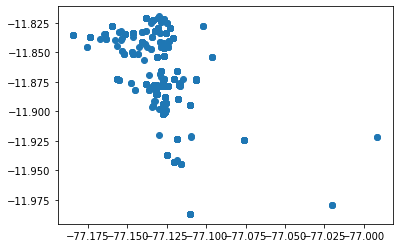

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(x=df['LONGITUDE'], y=df['LATITUDE'])
plt.show()

In [ ]:
import pandas as pd
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame

geometry = [Point(xy) for xy in zip(df['LONGITUDE'], df['LATITUDE'])]
gdf = GeoDataFrame(df, geometry=geometry)   

#this is a simple map that goes with geopandas
world = gpd.read_file(gpd.datasets.get_path('lima_callao_distritos.geojson'))
gdf.plot(ax=world.plot(figsize=(50, 10)), marker='o', color='red', markersize=15);

ValueError: ignored

In [ ]:
!

In [ ]:
import geojson
from descartes import PolygonPatch
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import numpy as np
 
with open("aez-w-greenland.geojson") as json_file:
    json_data = geojson.load(json_file)
    

ModuleNotFoundError: ignored

In [ ]:
plt.clf()
ax = plt.figure(figsize=(10,10)).add_subplot(111)#fig.gca()
 
m = Basemap(projection='robin', lon_0=0,resolution='c')
m.drawmapboundary(fill_color='white', zorder=-1)
m.drawparallels(np.arange(-90.,91.,30.), labels=[1,0,0,1], dashes=[1,1], linewidth=0.25, color='0.5',fontsize=14)
m.drawmeridians(np.arange(0., 360., 60.), labels=[1,0,0,1], dashes=[1,1], linewidth=0.25, color='0.5',fontsize=14)
m.drawcoastlines(color='0.6', linewidth=1)

In [ ]:
for i in range(2799):
    coordlist = json_data.features[i]['geometry']['coordinates'][0]
    if i < 2796:
        name = json_data.features[i]['properties']['CTRYNAME']
        aez =  json_data.features[i]['properties']['AEZ']
 
    for j in range(len(coordlist)):
        for k in range(len(coordlist[j])):
            coordlist[j][k][0],coordlist[j][k][1]=m(coordlist[j][k][0],coordlist[j][k][1])
 
    poly = {"type":"Polygon","coordinates":coordlist}#coordlist
    ax.add_patch(PolygonPatch(poly, fc=[0,0.5,0], ec=[0,0.3,0], zorder=0.2 ))
 
ax.axis('scaled')
plt.draw()
plt.show()
